In [5]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt

In [9]:
r = requests.get('https://www.pcmag.com/categories/processors/brands/intel')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*line-clamp-2.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]
reviews

["Intel's power-hungry, pricey Core i9-14900KS delivers too little extra performance versus its Core i9-14900K kin to merit the extra cash. Intel's previous-gen Core i9-13900K comes much more highly recommended.",
 "The Intel Core i5-13400F is a well-priced processor that's a fine fit for a budget gaming PC, but don't expect it to pair well with a high-end graphics card.",
 'The Core i7-14700K is the best value of Intel\'s refreshed "Raptor Lake" CPUs, bringing marked improvements at no extra cost. It\'s an attractive upgrade for older LGA 1700 systems.',
 "The Intel Core i5-14600K is near-indistinguishable from the Core i5-13600K in benchmark results. It's a fine-performing processor in its price class, but we see little reason to buy it if the 13th Gen model is available for less.",
 "Intel's Core i9-14900K processor is essentially the Core i9-13900K with a slight clock boost, but a bit more prone to overheating and throttling. If you can find a 13900K for less money, opt for it, as 

In [7]:
reviews[0]

"Intel's power-hungry, pricey Core i9-14900KS delivers too little extra performance versus its Core i9-14900K kin to merit the extra cash. Intel's previous-gen Core i9-13900K comes much more highly recommended."

In [8]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [10]:
df = pd.DataFrame(np.array(reviews), columns=['review'])
df

,review
0,"Intel's power-hungry, pricey Core i9-14900KS d..."
1,The Intel Core i5-13400F is a well-priced proc...
2,The Core i7-14700K is the best value of Intel'...
3,The Intel Core i5-14600K is near-indistinguish...
4,Intel's Core i9-14900K processor is essentiall...
5,"At $419, Intel's Core i7-13700K is a juggernau..."
6,Intel's Core i9-13900KS processor is scarcely ...
7,"Intel's Core i5-13600K is pricier, power-hungr..."
8,"Intel's ""Raptor Lake"" Core i9-13900K is the fa..."
9,Its higher clock speeds give Intel's Core i9-1...


In [12]:
df2=pd.read_csv('/content/reviewfin.csv')

df2 = df2.rename(columns={'REVIEWS': 'review'})
df2

,ID,review
0,1,Although not the unlocked chip most of us are ...
1,2,"When Intel Core Duo hit the stores, people wen..."
2,3,We compare the top two Intel Haswell processor...
3,4,Intels latest Ivy Bridge processors promise ex...
4,5,In this review we compare the latest top Haswe...
...,...,...
66,67,Theres no denying that Intels Core i9-14900K i...
67,68,The Intel Core i9-12900KS is the companys new ...
68,69,The Intel Core i9-12900K is Intels flagship pr...
69,70,"With the Core i7-12700K, Intel has released a ..."


In [13]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

merged_df = pd.concat([df, df2], ignore_index=True)
merged_df=merged_df.drop(columns=['ID'])
merged_df.to_csv('reviewfin.csv')
df=merged_df
df

,review
0,"Intel's power-hungry, pricey Core i9-14900KS d..."
1,The Intel Core i5-13400F is a well-priced proc...
2,The Core i7-14700K is the best value of Intel'...
3,The Intel Core i5-14600K is near-indistinguish...
4,Intel's Core i9-14900K processor is essentiall...
...,...
86,Theres no denying that Intels Core i9-14900K i...
87,The Intel Core i9-12900KS is the companys new ...
88,The Intel Core i9-12900K is Intels flagship pr...
89,"With the Core i7-12700K, Intel has released a ..."


In [22]:
df.to_csv('C:\\Users\\sanja\\OneDrive\\Desktop\\clg\\4th sem\\prob\\scrappedreviews.csv', index=False)


In [23]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [25]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [26]:
tokens = tokenizer.encode('really appreciateble', return_tensors='pt')
results=model(tokens)
results.logits
int(torch.argmax(results.logits))+1

5

In [27]:
df

,review,sentiment
0,"Intel's power-hungry, pricey Core i9-14900KS d...",3
1,The Intel Core i5-13400F is a well-priced proc...,4
2,The Core i7-14700K is the best value of Intel'...,5
3,The Intel Core i5-14600K is near-indistinguish...,3
4,Intel's Core i9-14900K processor is essentiall...,4
...,...,...
86,Theres no denying that Intels Core i9-14900K i...,4
87,The Intel Core i9-12900KS is the companys new ...,5
88,The Intel Core i9-12900K is Intels flagship pr...,5
89,"With the Core i7-12700K, Intel has released a ...",5


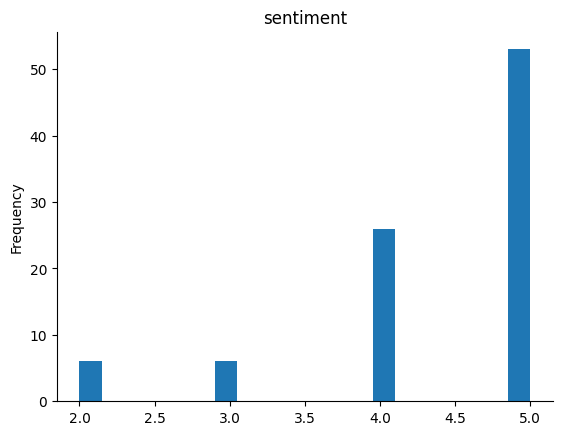

In [28]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)